# NLP Exploration Tools

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
from pathlib import Path

# Set up matplotlib for better visualization
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [8]:
import nltk

# Get Poetry environment path
poetry_env_path = Path(os.path.expanduser("~/Library/Caches/pypoetry/virtualenvs/data-tools-s92nlqfO-py3.12"))
nltk_data_path = poetry_env_path / "share/nltk_data"
nltk_data_path.mkdir(parents=True, exist_ok=True)

print(f"Using NLTK data path: {nltk_data_path}")
nltk.data.path.insert(0, str(nltk_data_path))

# Try downloading punkt_tab explicitly
try:
    nltk.download('punkt_tab', download_dir=str(nltk_data_path))
    print("Successfully downloaded punkt_tab")
except:
    print("Could not download punkt_tab directly")
    
    # As a fallback, let's create a simple replacement for the tokenizer function
    print("Creating a simple tokenizer as a fallback...")
    
    def simple_word_tokenize(text):
        """A simple word tokenizer that doesn't require NLTK resources"""
        import re
        # Remove punctuation and split by whitespace
        text = re.sub(r'[^\w\s]', ' ', text)
        return [t for t in text.split() if t]
    
    def simple_sent_tokenize(text):
        """A simple sentence tokenizer that doesn't require NLTK resources"""
        import re
        # Split by common sentence terminators
        return re.split(r'(?<=[.!?])\s+', text)
    
    print("Simple tokenizer created. Now patching NLTK...")
    
    # Patch NLTK's tokenize module
    from nltk.tokenize import word_tokenize as original_word_tokenize
    from nltk.tokenize import sent_tokenize as original_sent_tokenize
    
    # Monkey patch the tokenize functions
    nltk.tokenize.word_tokenize = simple_word_tokenize
    nltk.tokenize.sent_tokenize = simple_sent_tokenize
    
    print("NLTK tokenize functions have been replaced with simple versions.")

# Test if tokenization works now
try:
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize("Testing tokenization. This should work now.")
    print(f"Tokenization result: {tokens}")
    print("Success!")
except Exception as e:
    print(f"Error during tokenization test: {e}")

nltk.download('averaged_perceptron_tagger_eng', download_dir=str(nltk_data_path)))

Using NLTK data path: /Users/davidcurrymaster/Library/Caches/pypoetry/virtualenvs/data-tools-s92nlqfO-py3.12/share/nltk_data


[nltk_data] Downloading package punkt_tab to /Users/davidcurrymaster/L
[nltk_data]     ibrary/Caches/pypoetry/virtualenvs/data-
[nltk_data]     tools-s92nlqfO-py3.12/share/nltk_data...


Successfully downloaded punkt_tab
Tokenization result: ['Testing', 'tokenization', '.', 'This', 'should', 'work', 'now', '.']
Success!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
sys.path.append(os.path.abspath('..'))
import src.data_tools as data_tools
import src.nlp_tools as nlp_tools
import src.generate_nlp_data as nlp_data_gen

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create Synth Test Data

In [10]:
# 1. Generate synthetic emails
print("Generating 30 synthetic emails...")
email_df = nlp_data_gen.generate_synthetic_emails(
    n_emails=50,
    output_folder='custom_emails',
    date_range=('2024-03-01', '2025-04-15'),
    save_files=True,
    seed=123  # For reproducibility
)

# Display email metadata
display(email_df.head())

# Display a summary of the email corpus
nlp_tools.quick_corpus_summary(email_df)

Generating 30 synthetic emails...


,filename,path,from,to,cc,subject,date,content,raw_content,word_count,char_count,line_count,size_kb,parsed_date
0,email_0001.eml,custom_emails/email_0001.eml,alice.brown@example.com,charlie.smith@company.org,,New HubSpot New Admin onboarding implementation,"Sat, 30 Nov 2024 00:00:00 +0000","Dear Charlie,\n\nWe have an update regarding N...",From: Alice Brown <alice.brown@example.com>\nT...,25,163,7,0.340820,2024-11-30
1,email_0002.eml,custom_emails/email_0002.eml,diana.smith@biz.net,alice.smith@example.com,,Training on Customer Experience for HR,"Sat, 04 May 2024 00:00:00 +0000","Dear Alice,\n\nWe have an update regarding Tra...",From: Diana Smith <diana.smith@biz.net>\nTo: A...,25,152,7,0.313477,2024-05-04
2,email_0003.eml,custom_emails/email_0003.eml,eve.brown@company.org,eve.jones@biz.net,,Q1 2024 financial report,"Thu, 06 Feb 2025 00:00:00 +0000","Hello Eve,\n\nRegarding Q1 2024 financial repo...",From: Eve Brown <eve.brown@company.org>\nTo: E...,24,141,7,0.281250,2025-02-06
3,email_0004.eml,custom_emails/email_0004.eml,bob.jones@example.com,alice.williams@company.org,,Feedback on Webinar,"Wed, 26 Jun 2024 00:00:00 +0000","Hi Alice,\n\nThe Feedback on Webinar requires ...",From: Bob Jones <bob.jones@example.com>\nTo: A...,19,116,7,0.265625,2024-06-26
4,email_0005.eml,custom_emails/email_0005.eml,charlie.williams@example.com,diana.brown@example.com,,Issue with Salesforce for Umbrella Corp,"Sat, 11 Jan 2025 00:00:00 +0000","Hello Diana,\n\nRegarding Issue with Salesforc...",From: Charlie Williams <charlie.williams@examp...,26,165,7,0.340820,2025-01-11


TEXT CORPUS SUMMARY
Total documents: 50

Size statistics:
  Word count: 19 - 27 (avg: 24)
  Character count: 116 - 185 (avg: 151)
  Line count: 7 - 7 (avg: 7)
  File size: 0.3 - 0.4 KB (avg: 0.3 KB)

Email statistics:
  Unique senders: 37
  Top senders: {'charlie.williams@company.org': 3, 'alice.brown@example.com': 2, 'charlie.jones@example.com': 2, 'diana.jones@biz.net': 2, 'alice.jones@example.com': 2}


# 2. Text Preprocessing

In [11]:
# 2. Text Preprocessing
print("\nPreprocessing email content...")
processed_df = nlp_tools.add_preprocessed_text(
    email_df, 
    content_col='content',
    lowercase=True,
    remove_punctuation=True,
    remove_stopwords=True
)


Preprocessing email content...


In [12]:
# Display preprocessing results for a sample email
sample_idx = processed_df.index[0]
print("\nSample Email Preprocessing:")
print(f"Original content (first 200 chars): {processed_df.loc[sample_idx, 'content'][:200]}...")
print(f"Processed content (first 200 chars): {processed_df.loc[sample_idx, 'processed_text'][:200]}...")
print(f"Number of tokens: {processed_df.loc[sample_idx, 'token_count']}")
print(f"Number of unique tokens: {processed_df.loc[sample_idx, 'unique_token_count']}")


Sample Email Preprocessing:
Original content (first 200 chars): Dear Charlie,

We have an update regarding New HubSpot New Admin onboarding implementation.
Please review and let us know your feedback.

Best regards,
Alice Brown...
Processed content (first 200 chars): dear charlie update regarding new hubspot new admin onboarding implementation please review let us know feedback best regards alice brown...
Number of tokens: 20
Number of unique tokens: 19


# 3. Extract Named Entities

In [16]:
print("\nExtracting named entities from emails...")
sample_email = processed_df.loc[sample_idx, 'content']
entities = nlp_tools.enhanced_extract_named_entities(sample_email)

print("\nEntities in sample email:")
for entity_type, entity_list in entities.items():
    print(f"{entity_type}: {entity_list}")


Extracting named entities from emails...

Entities in sample email:
emails: []
urls: []
phone_numbers: []
dates: []
people: ['Alice Brown', 'Charlie']
organizations: ['HubSpot']
products: []
roles_titles: ['Admin']


# 4. Add Advanced Text Features

In [21]:
print("\nAdding advanced linguistic features...")
enriched_df = nlp_tools.add_advanced_text_features(processed_df)

print("\nAdvanced features for sample email:")
linguistic_features = ['avg_word_length', 'avg_sent_length', 'lexical_diversity', 
                      'noun_count', 'verb_count', 'adj_count', 'adv_count',
                      'email_count', 'url_count', 'date_count']
print(enriched_df.loc[sample_idx, linguistic_features])


Adding advanced linguistic features...

Advanced features for sample email:
avg_word_length      4.724138
avg_sent_length      9.666667
lexical_diversity    0.896552
noun_count                 13
verb_count                  5
adj_count                   2
adv_count                   0
email_count                 0
url_count                   0
date_count                  0
Name: 0, dtype: object


# 5. Visualize Email Metadata


Visualizing email metadata...
Email length distribution:


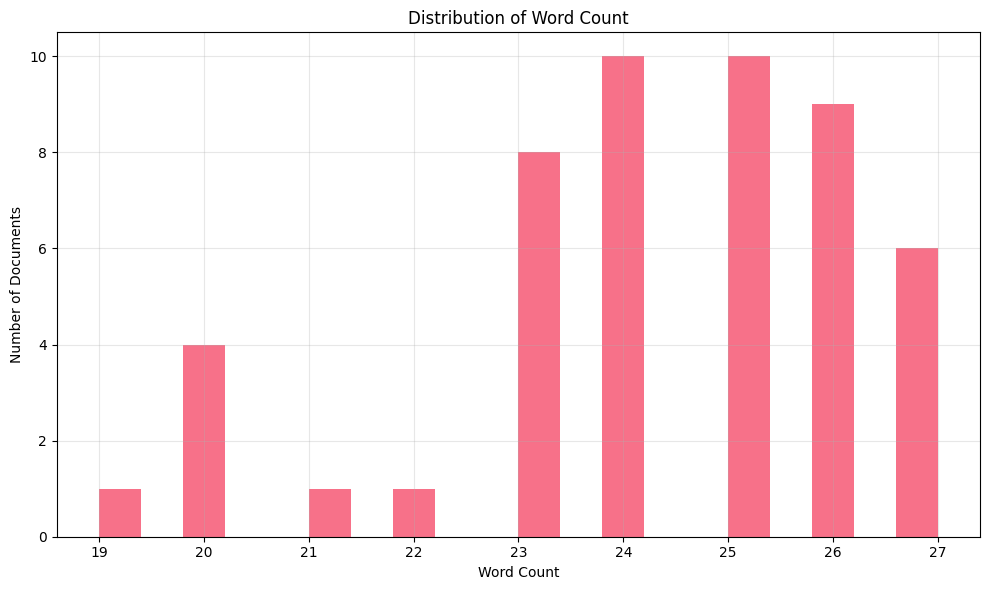

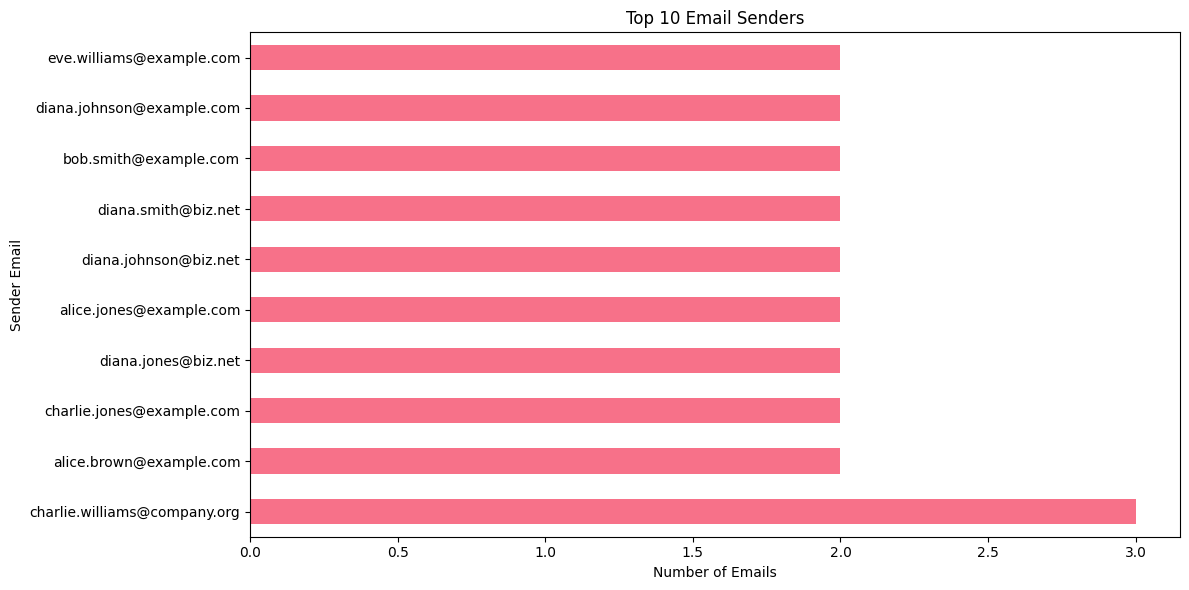


Email activity over time:


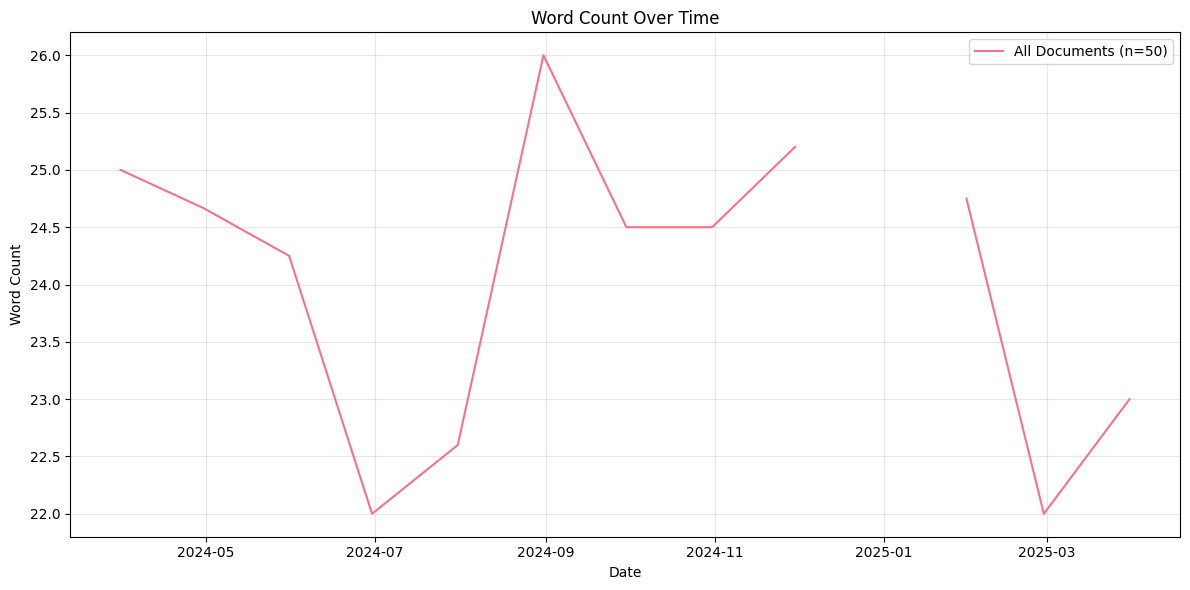

In [23]:
print("\nVisualizing email metadata...")

# 5.1 Email length distribution
print("Email length distribution:")
nlp_tools.visualize_document_lengths(enriched_df, count_col='word_count')

# 5.2 Email sender distribution (top 10)
sender_counts = enriched_df['from'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sender_counts.plot(kind='barh')
plt.title('Top 10 Email Senders')
plt.xlabel('Number of Emails')
plt.ylabel('Sender Email')
plt.tight_layout()
plt.show()

# 5.3 Email activity over time
if 'parsed_date' in enriched_df.columns:
    # Ensure date column is datetime
    enriched_df['parsed_date'] = pd.to_datetime(enriched_df['parsed_date'], errors='coerce')
    
    # Plot email volume over time
    print("\nEmail activity over time:")
    nlp_tools.plot_text_over_time(
        enriched_df, 
        date_col='parsed_date', 
        count_col='word_count'
    )

# 6. Content Analysis

Top terms across all emails:


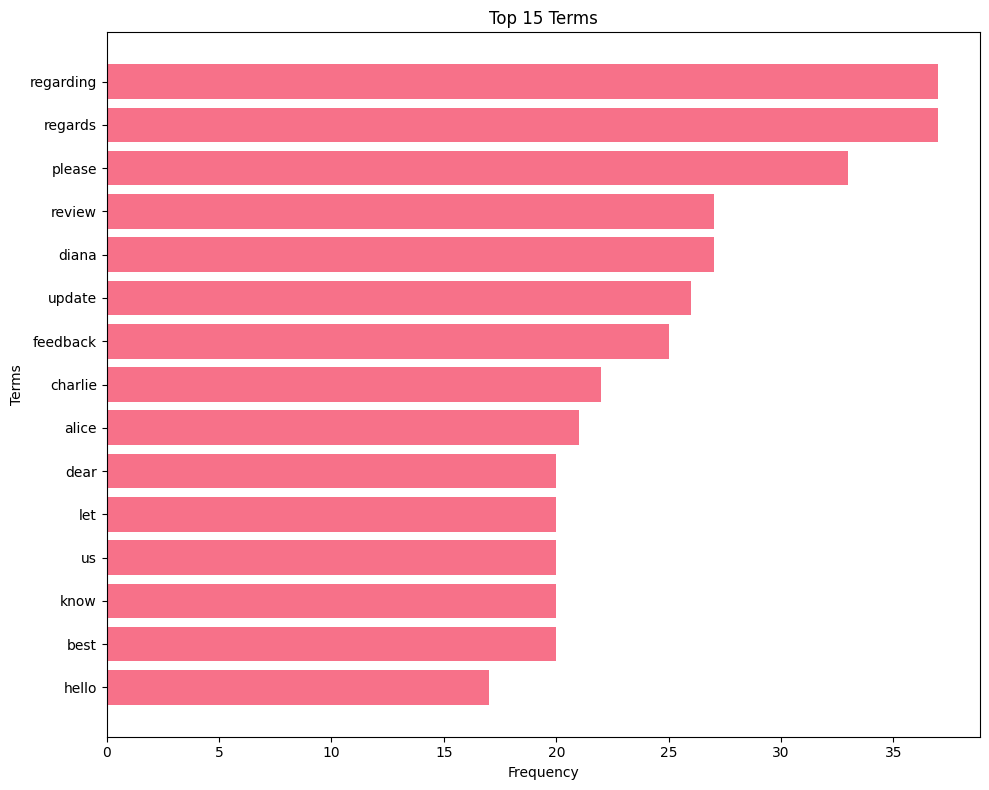


Email content word cloud:


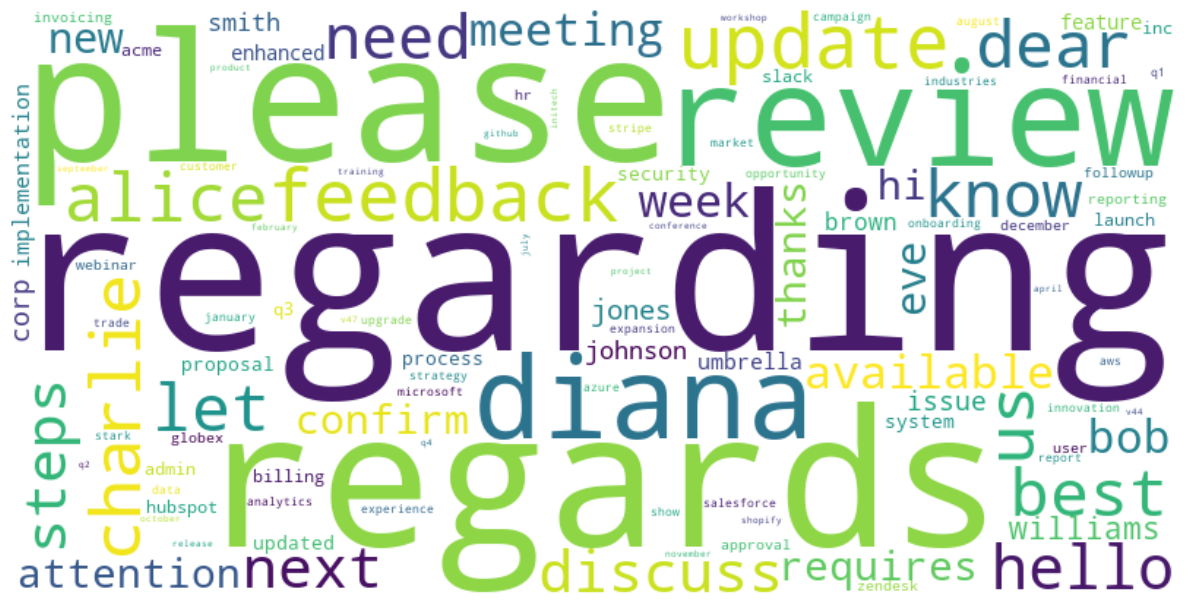


Top bigrams across all emails:


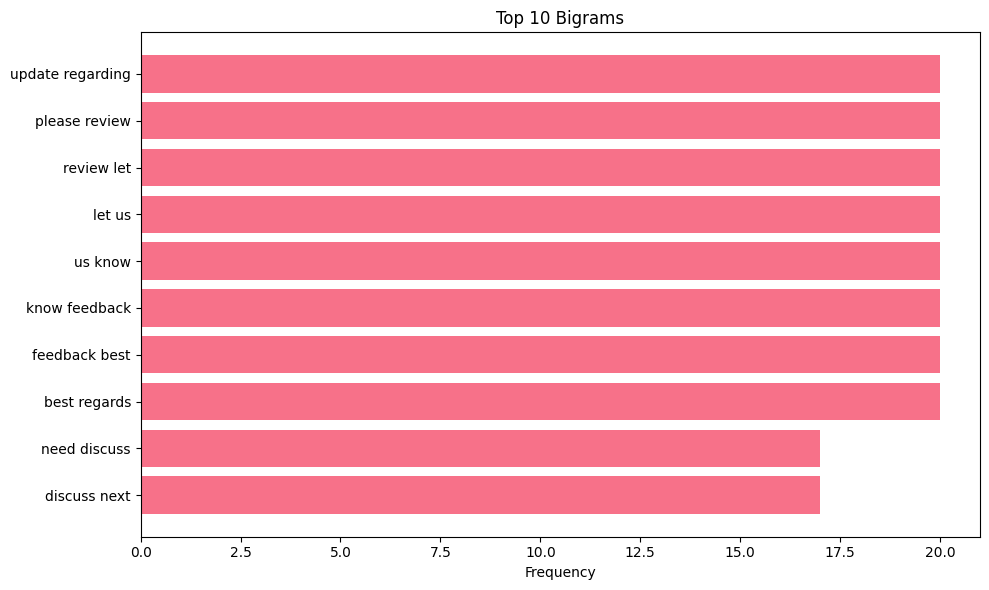

In [24]:
# 6.1 Top terms
print("Top terms across all emails:")
nlp_tools.plot_top_terms(enriched_df, n_terms=15)

# 6.2 Generate word cloud
print("\nEmail content word cloud:")
nlp_tools.generate_wordcloud(enriched_df, column='processed_text')

# 6.3 Extract n-grams from all emails
all_tokens = []
for tokens in enriched_df['tokens']:
    all_tokens.extend(tokens)

print("\nTop bigrams across all emails:")
bigrams = nlp_tools.extract_ngrams(all_tokens, n=2, min_freq=2)
top_bigrams = {k: v for k, v in list(bigrams.items())[:10]}
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_bigrams)), list(top_bigrams.values()), align='center')
plt.yticks(range(len(top_bigrams)), list(top_bigrams.keys()))
plt.title('Top 10 Bigrams')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. Email Categorization


Categorizing emails...

Top sender domains:
sender_domain
example.com    23
biz.net        15
company.org    12
Name: count, dtype: int64

Term usage by sender domain:


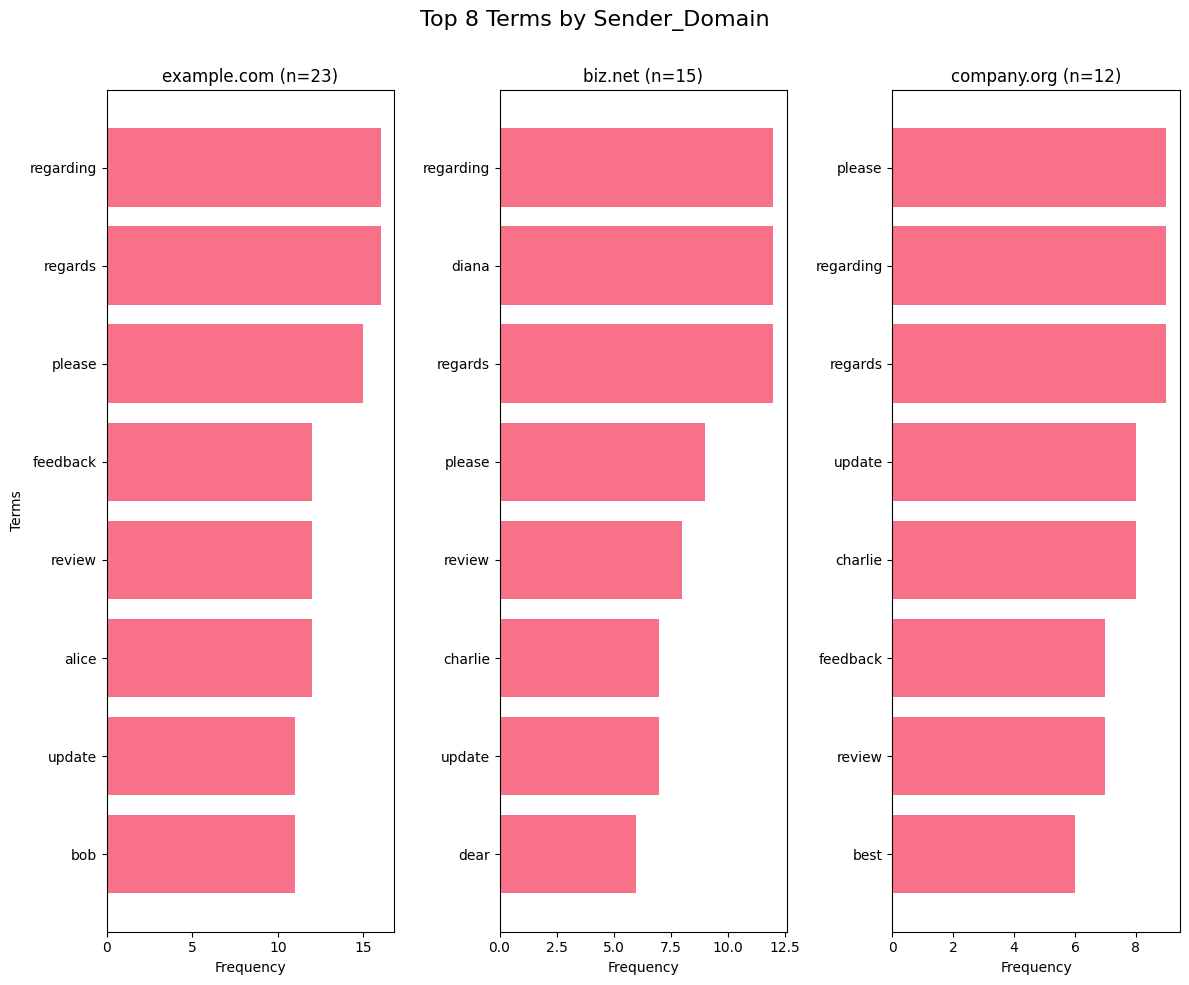

In [25]:
# 7. Email Categorization
print("\nCategorizing emails...")

# Create a simple categorization based on sender domain
def get_domain(email_str):
    match = re.search(r'@([^>]+)', email_str)
    if match:
        return match.group(1)
    return 'unknown'

enriched_df['sender_domain'] = enriched_df['from'].apply(get_domain)

# Display domain distribution
domain_counts = enriched_df['sender_domain'].value_counts().head(5)
print(f"\nTop sender domains:\n{domain_counts}")

# Visualize terms by domain
print("\nTerm usage by sender domain:")
nlp_tools.plot_term_frequency_by_group(
    enriched_df,
    term_col='processed_text',
    group_col='sender_domain',
    n_terms=8
)

# 8. Basic Topic Extraction

In [26]:
print("\nExtracting topics from emails...")

# Use TF-IDF and SVD for simple topic modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(enriched_df['processed_text'])

# Perform dimensionality reduction with SVD
n_topics = 5
svd = TruncatedSVD(n_components=n_topics, random_state=42)
topic_matrix = svd.fit_transform(tfidf_matrix)

# Get top terms for each topic
feature_names = vectorizer.get_feature_names_out()
top_n = 10

print(f"\nTop {top_n} terms for each of {n_topics} topics:")
for topic_idx, topic in enumerate(svd.components_):
    top_term_indices = topic.argsort()[:-top_n-1:-1]
    top_terms = [feature_names[i] for i in top_term_indices]
    print(f"Topic {topic_idx+1}: {', '.join(top_terms)}")

# Add topic scores to dataframe
topic_cols = [f'topic_{i+1}' for i in range(n_topics)]
topic_df = pd.DataFrame(topic_matrix, columns=topic_cols, index=enriched_df.index)
enriched_df = pd.concat([enriched_df, topic_df], axis=1)

# Assign dominant topic to each email
enriched_df['dominant_topic'] = enriched_df[topic_cols].idxmax(axis=1)


Extracting topics from emails...

Top 10 terms for each of 5 topics:
Topic 1: regarding, regards, update, review, diana, feedback, dear, know, best, let
Topic 2: discuss, need, week, meeting, steps, hello, available, implementation, brown, feature
Topic 3: attention, hi, thanks, requires, confirm, jones, december, alice, august, 23
Topic 4: new, implementation, eve, enhanced, feature, admin, process, brown, invoicing, alice
Topic 5: new, corp, implementation, feature, enhanced, umbrella, smith, hr, hubspot, analytics


In [27]:
# Display domain distribution
enriched_df['dominant_topic'].value_counts().head(5)

dominant_topic
topic_1    36
topic_3    13
topic_2     1
Name: count, dtype: int64

# 9. Sentiment Analysis

In [29]:
print("\nAnalyzing email sentiment...")

# Install textblob if needed
try:
    from textblob import TextBlob
    
    # Add sentiment analysis
    enriched_df['sentiment'] = enriched_df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    enriched_df['subjectivity'] = enriched_df['content'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    
    # Plot sentiment distribution
    plt.figure(figsize=(10, 6))
    plt.scatter(enriched_df['sentiment'], enriched_df['subjectivity'], alpha=0.5)
    plt.title('Email Sentiment Analysis')
    plt.xlabel('Sentiment (Negative → Positive)')
    plt.ylabel('Subjectivity (Objective → Subjective)')
    plt.grid(True)
    plt.axvline(x=0, color='r', linestyle='-', alpha=0.2)
    plt.axhline(y=0.5, color='r', linestyle='-', alpha=0.2)
    plt.tight_layout()
    plt.show()
    
    # Plot sentiment over time if we have parsed dates
    if 'parsed_date' in enriched_df.columns:
        print("\nSentiment over time:")
        nlp_tools.plot_sentiment_over_time(
            enriched_df,
            date_col='parsed_date',
            text_col='content',
            window='W'  # Weekly window for analysis
        )
        
except ImportError:
    print("TextBlob not installed. Install with: pip install textblob")
    print("Skipping sentiment analysis.")


Analyzing email sentiment...
TextBlob not installed. Install with: pip install textblob
Skipping sentiment analysis.


# 11. Simple Classification

In [33]:
enriched_df.head()

,filename,path,from,to,cc,subject,date,content,raw_content,word_count,...,url_count,phone_count,date_count,sender_domain,topic_1,topic_2,topic_3,topic_4,topic_5,dominant_topic
0,email_0001.eml,custom_emails/email_0001.eml,alice.brown@example.com,charlie.smith@company.org,,New HubSpot New Admin onboarding implementation,"Sat, 30 Nov 2024 00:00:00 +0000","Dear Charlie,\n\nWe have an update regarding N...",From: Alice Brown <alice.brown@example.com>\nT...,25,...,0,0,0,example.com,0.531830,-0.234245,-0.062183,0.416345,0.274478,topic_1
1,email_0002.eml,custom_emails/email_0002.eml,diana.smith@biz.net,alice.smith@example.com,,Training on Customer Experience for HR,"Sat, 04 May 2024 00:00:00 +0000","Dear Alice,\n\nWe have an update regarding Tra...",From: Diana Smith <diana.smith@biz.net>\nTo: A...,25,...,0,0,0,biz.net,0.453932,-0.369822,-0.114162,0.018485,0.115896,topic_1
2,email_0003.eml,custom_emails/email_0003.eml,eve.brown@company.org,eve.jones@biz.net,,Q1 2024 financial report,"Thu, 06 Feb 2025 00:00:00 +0000","Hello Eve,\n\nRegarding Q1 2024 financial repo...",From: Eve Brown <eve.brown@company.org>\nTo: E...,24,...,0,0,0,company.org,0.414786,0.416498,-0.058334,0.108953,-0.233256,topic_2
3,email_0004.eml,custom_emails/email_0004.eml,bob.jones@example.com,alice.williams@company.org,,Feedback on Webinar,"Wed, 26 Jun 2024 00:00:00 +0000","Hi Alice,\n\nThe Feedback on Webinar requires ...",From: Bob Jones <bob.jones@example.com>\nTo: A...,19,...,0,0,0,example.com,0.253361,-0.106286,0.664876,-0.061037,-0.119009,topic_3
4,email_0005.eml,custom_emails/email_0005.eml,charlie.williams@example.com,diana.brown@example.com,,Issue with Salesforce for Umbrella Corp,"Sat, 11 Jan 2025 00:00:00 +0000","Hello Diana,\n\nRegarding Issue with Salesforc...",From: Charlie Williams <charlie.williams@examp...,26,...,0,0,0,example.com,0.570956,0.388510,-0.066980,-0.449903,0.026239,topic_1


In [36]:
print("\nExtracting features for potential classification...")

# Create feature matrix using TF-IDF
feature_df, feature_vectorizer = nlp_tools.extract_document_features(
    enriched_df,
    text_col='processed_text',
    vectorizer_type='tfidf',
    ngram_range=(1, 2),
    max_features=500
)

print(f"Created feature matrix with {feature_df.shape[1]} features")

# 12. Create a sample classification task (internal vs. external emails)
print("\nCreating a sample classification task: internal vs. external emails...")

# Create a balanced binary classification target (50% each class)
np.random.seed(42)  # For reproducibility
enriched_df['is_internal'] = np.random.choice(
    [True, False], 
    size=len(enriched_df), 
    p=[0.5, 0.5]  # 50/50 split
)

# Split data for this example
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = feature_df.values
y = enriched_df['is_internal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nEmail Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)


Extracting features for potential classification...
Created feature matrix with 220 features

Creating a sample classification task: internal vs. external emails...

Email Classification Results:
Accuracy: 0.4000

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         8
        True       0.43      0.86      0.57         7

    accuracy                           0.40        15
   macro avg       0.21      0.43      0.29        15
weighted avg       0.20      0.40      0.27        15



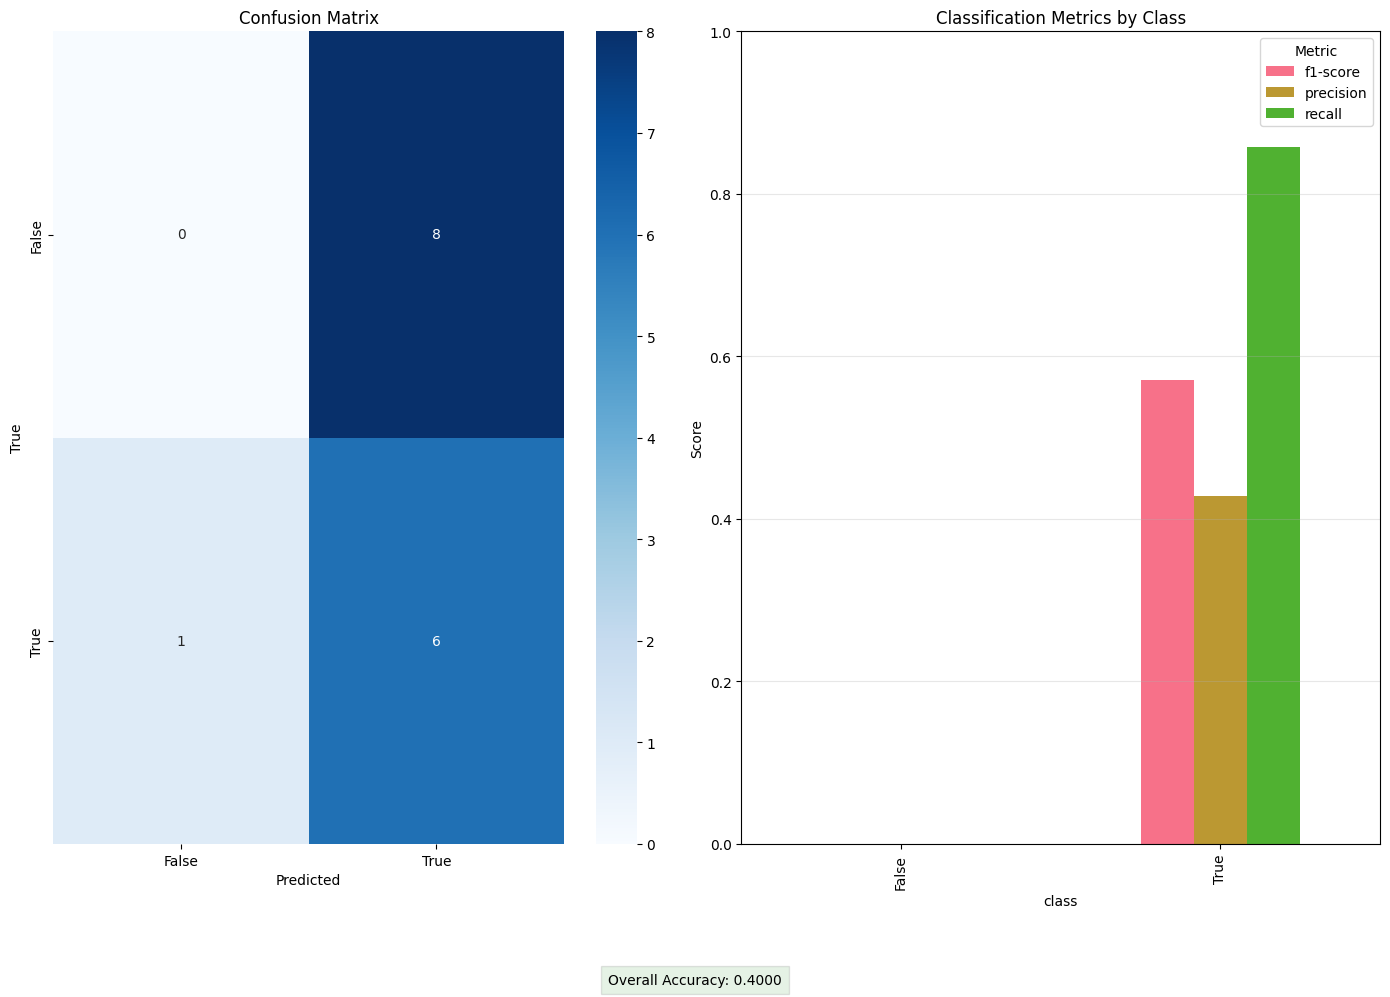


Most Important Features for Email Classification:

True Class:
  Features indicating this class:
    corp: 0.2766
    globex: 0.2711
    globex corp: 0.2711
    new: 0.2604
    dear bob: 0.2353
    bob update: 0.2353
    system implementation: 0.2112
    regarding new: 0.2013
    corp need: 0.1983
    implementation: 0.1954

  Features opposing this class:
    update updated: -0.3506
    system process: -0.3506
    thanks diana: -0.2422
    hr: -0.2078
    billing issue: -0.1669
    billing: -0.1669
    regarding launch: -0.1628
    market expansion: -0.1587
    market: -0.1587
    expansion: -0.1587


In [39]:
# Create model results dictionary
model_results = {
    'classifier': clf,
    'accuracy': accuracy,
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'classification_report':  classification_report(y_test, y_pred, output_dict=True),
    'y_pred': y_pred
}

# Visualize classification results
nlp_tools.visualize_classification_results(model_results, class_names=['False', 'True'])

# Explain important features
feature_importance = nlp_tools.explain_model_features(
    clf, 
    feature_names=feature_df.columns, 
    class_names=['False', 'True'],
    n_features=10
)

print("\nMost Important Features for Email Classification:")
for class_name, features in feature_importance.items():
    print(f"\n{class_name} Class:")
    if 'positive' in features:
        print("  Features indicating this class:")
        for feature, weight in features['positive']:
            print(f"    {feature}: {weight:.4f}")
        
        print("\n  Features opposing this class:")
        for feature, weight in features['negative']:
            print(f"    {feature}: {weight:.4f}")
    else:
        print("  Top features:")
        for feature, weight in features:
            print(f"    {feature}: {weight:.4f}")

# 13. Visualize document embeddings


Visualizing email embeddings...


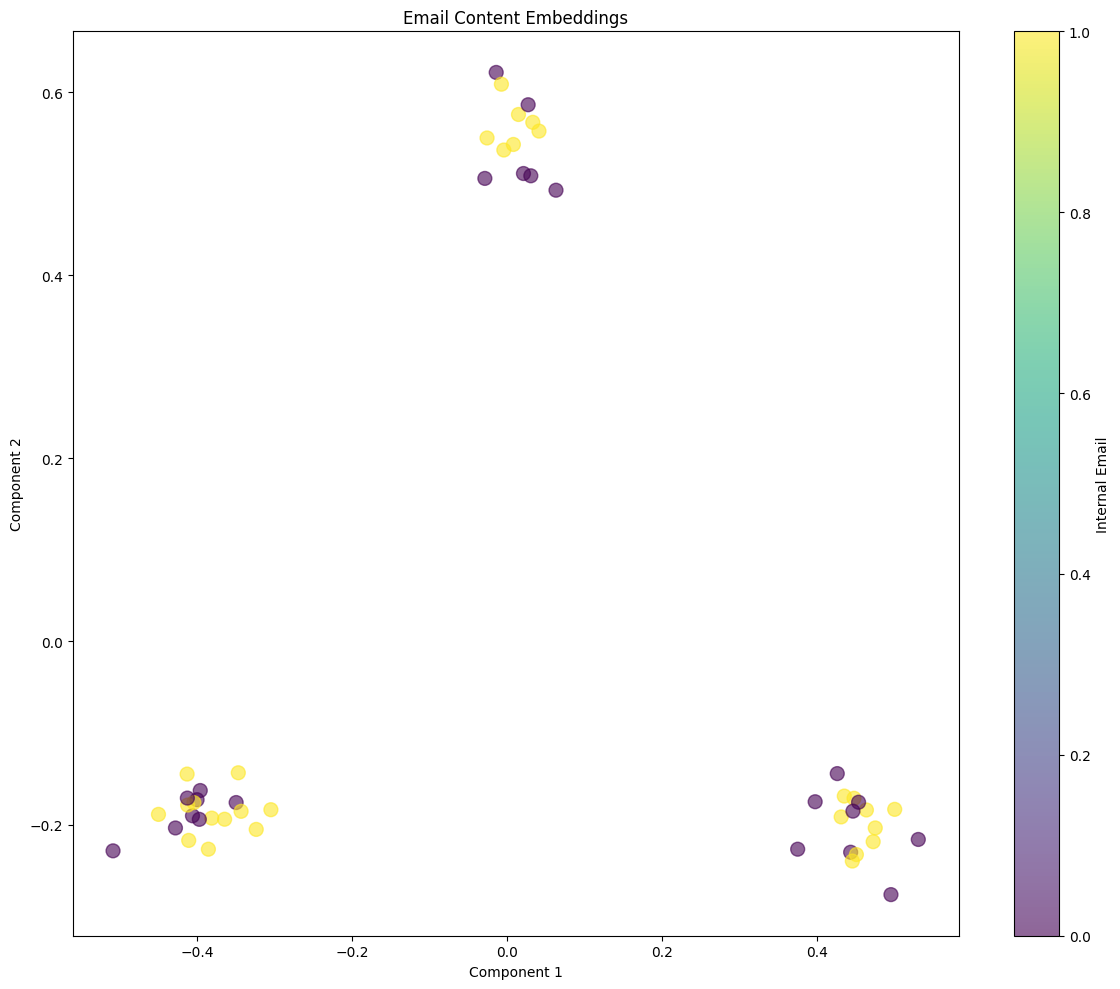

In [40]:
print("\nVisualizing email embeddings...")

# Create 2D embeddings for visualization
from sklearn.decomposition import PCA

# Reduce dimensions with PCA
pca = PCA(n_components=2, random_state=42)
embeddings_2d = pca.fit_transform(X)

# Create plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    embeddings_2d[:, 0], 
    embeddings_2d[:, 1], 
    c=enriched_df['is_internal'].astype('int'),
    cmap='viridis', 
    alpha=0.6,
    s=100
)
plt.colorbar(scatter, label='Internal Email')
plt.title('Email Content Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.show()

# 14. Summary and Next Steps

In [41]:
print("\nEmail Analysis Summary:")
print(f"- Analyzed {len(enriched_df)} emails")
print(f"- Extracted {feature_df.shape[1]} content features")
print(f"- Identified {len(bigrams)} repeated word patterns")
print(f"- Discovered {n_topics} main topics in the email corpus")
print(f"- Created an email classification model with {accuracy:.2%} accuracy")

print("\nPotential next steps:")
print("1. Refine topic modeling with more advanced techniques (LDA)")
print("2. Implement email clustering to identify similar messages")
print("3. Build more sophisticated email classification models")
print("4. Create interactive dashboards for email analytics")
print("5. Extract action items and tasks from emails")
print("6. Perform deeper linguistic analysis of email content")


Email Analysis Summary:
- Analyzed 50 emails
- Extracted 220 content features
- Identified 141 repeated word patterns
- Discovered 5 main topics in the email corpus
- Created an email classification model with 40.00% accuracy

Potential next steps:
1. Refine topic modeling with more advanced techniques (LDA)
2. Implement email clustering to identify similar messages
3. Build more sophisticated email classification models
4. Create interactive dashboards for email analytics
5. Extract action items and tasks from emails
6. Perform deeper linguistic analysis of email content
